In [1]:
!pip install category_encoders
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import category_encoders as ce
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data=pd.read_csv('Company_Data.csv')

In [3]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<Figure size 1500x1000 with 0 Axes>

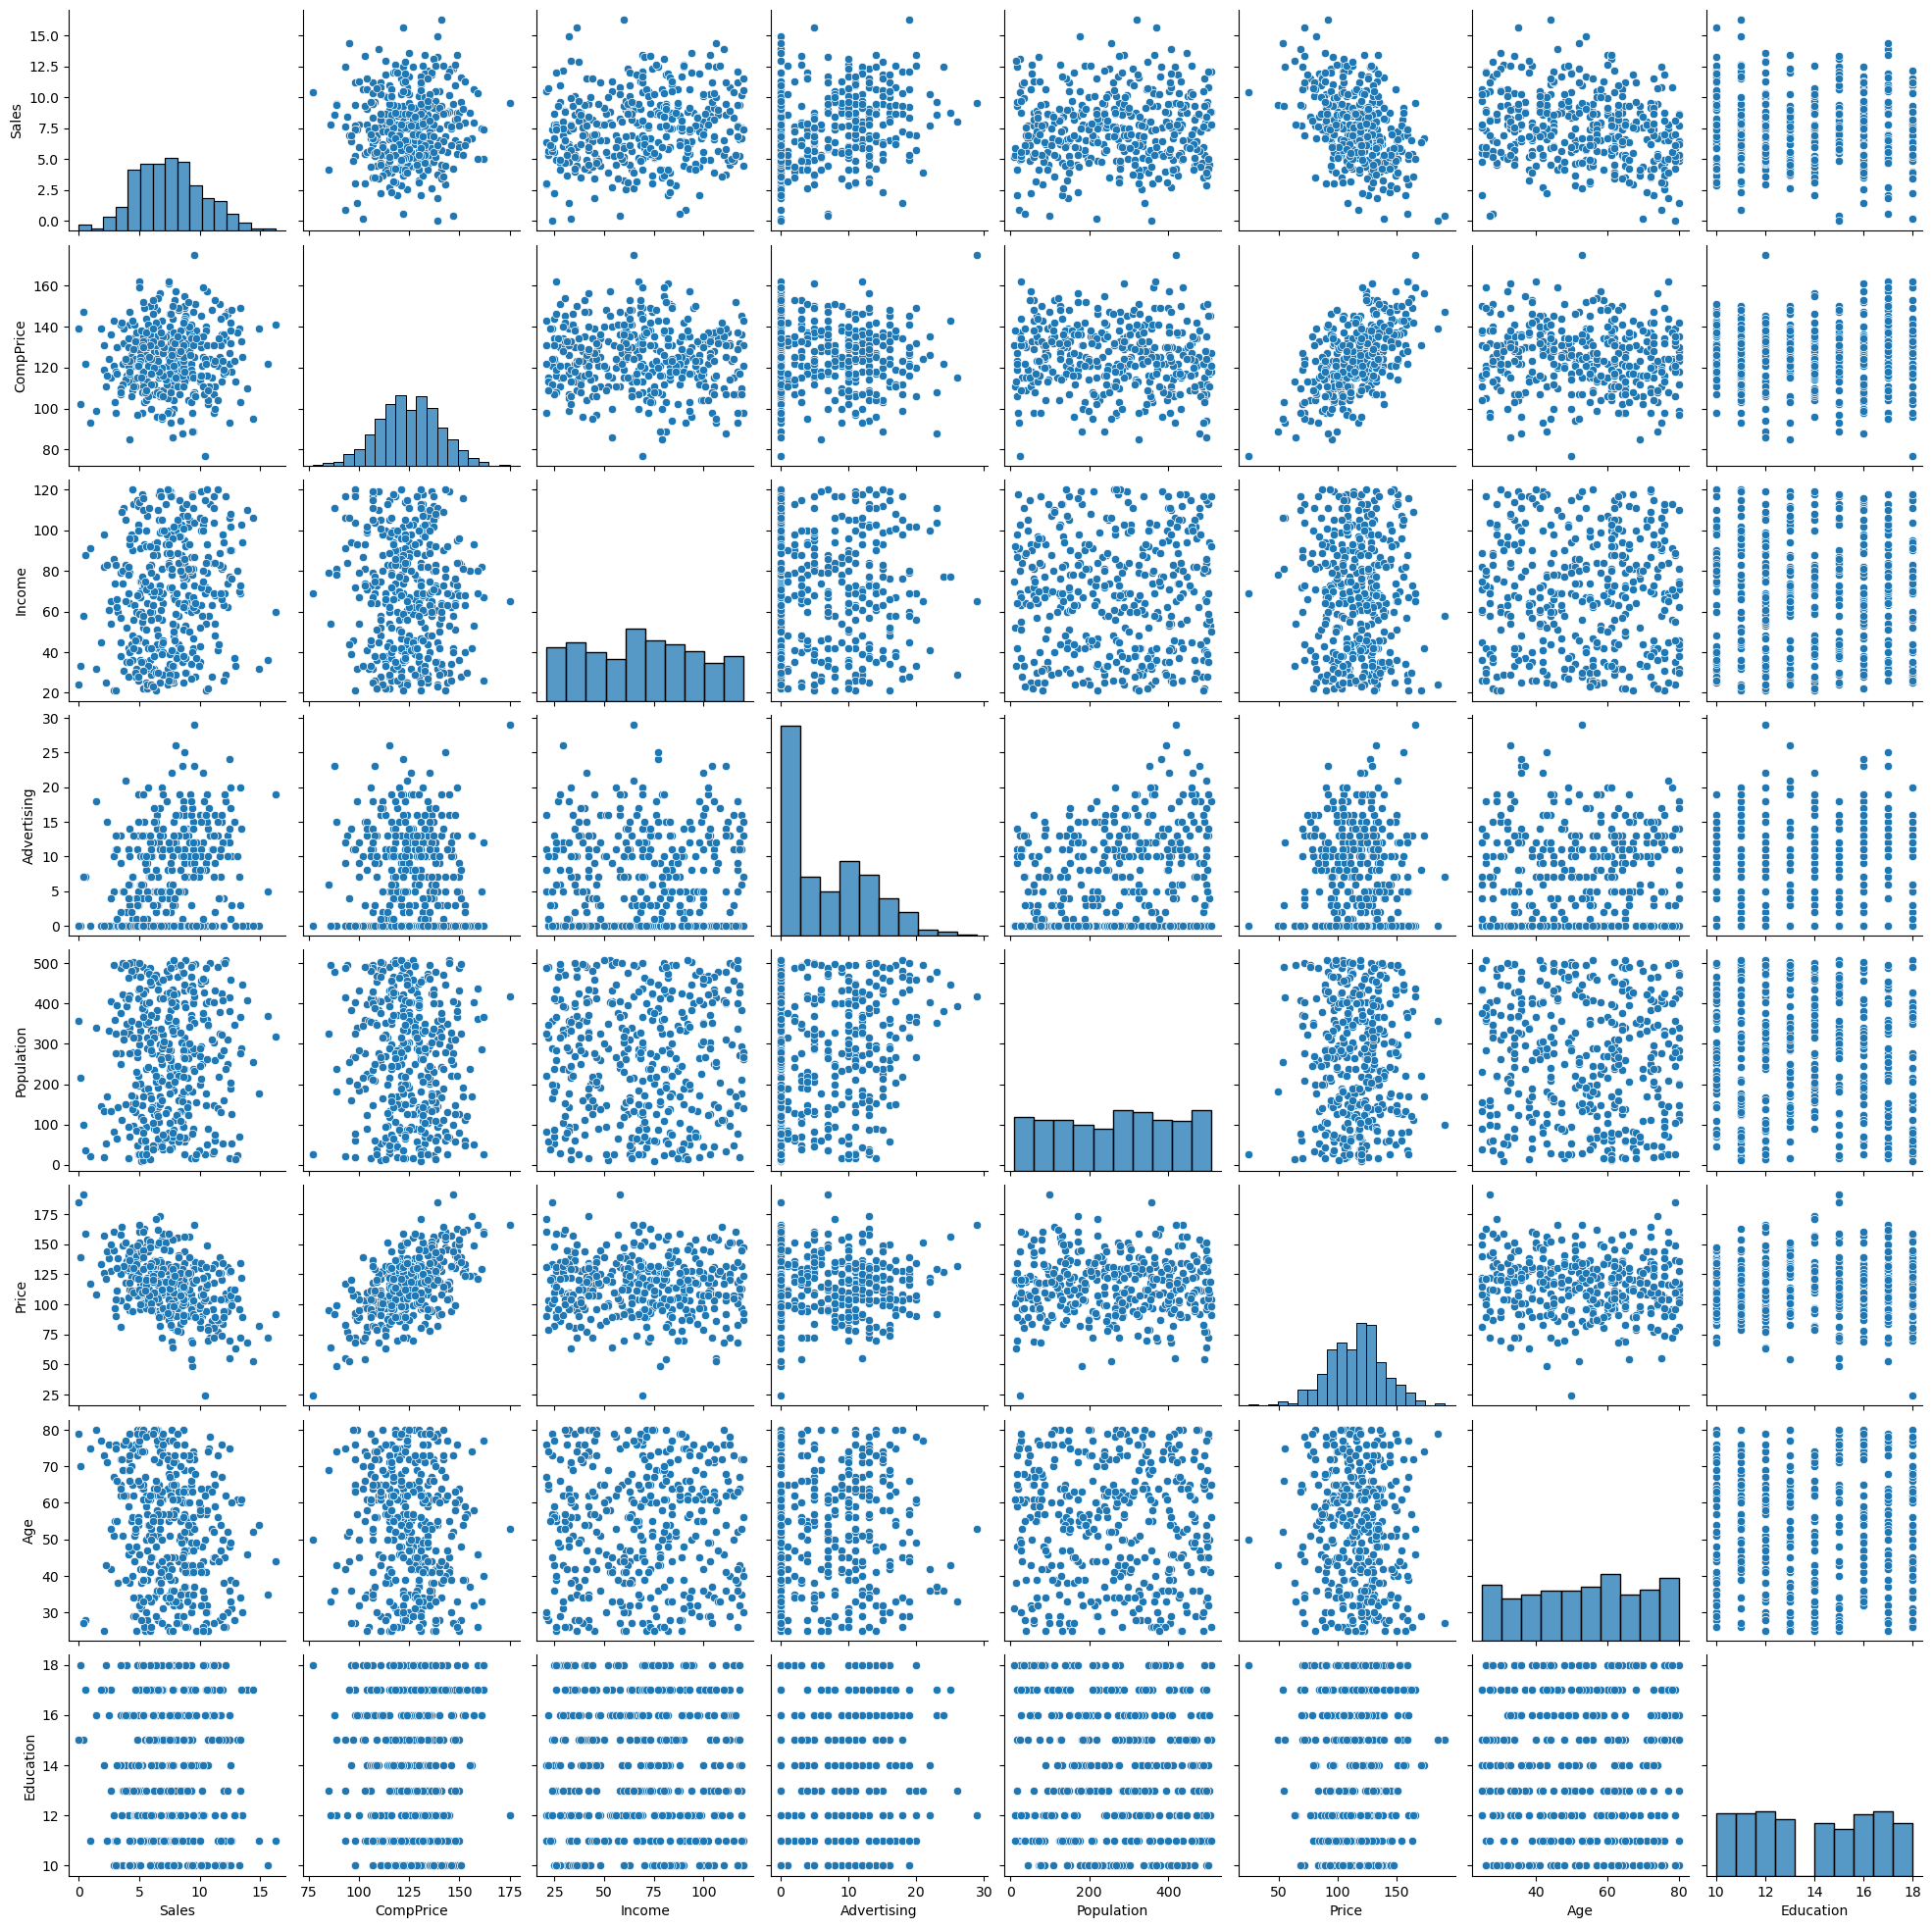

In [6]:
plt.figure(figsize=(15,10))
sns.pairplot(data)
plt.show() 

In [7]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
data.Sales.describe() 

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [9]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [10]:
#converting the categorical variables into numerical varaibles
encoder=ce.OrdinalEncoder(cols=['ShelveLoc','Urban','US'])
data1=encoder.fit_transform(data) 

In [11]:
data1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,1,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,3,59,12,1,1
3,7.40,117,100,4,466,97,3,55,14,1,1
4,4.15,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,3,55,11,2,1
397,7.41,162,26,12,368,159,3,40,18,1,1
398,5.94,100,79,7,284,95,1,50,12,1,1


In [12]:
sales_value= []
for i in data1['Sales']: 
 if i<=7.49:
    sales_value.append('low')
 else:
    sales_value.append('high')
data1['sales_value']=sales_value

In [13]:
data1.drop(['Sales'], axis=1, inplace=True)
data1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_value
0,138,73,11,276,120,1,42,17,1,1,high
1,111,48,16,260,83,2,65,10,1,1,high
2,113,35,10,269,80,3,59,12,1,1,high
3,117,100,4,466,97,3,55,14,1,1,low
4,141,64,3,340,128,1,38,13,1,2,low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1,high
396,139,23,3,37,120,3,55,11,2,1,low
397,162,26,12,368,159,3,40,18,1,1,low
398,100,79,7,284,95,1,50,12,1,1,low


In [14]:
#Converting the categorical variable to numerical numbers
encoding=preprocessing.LabelEncoder()
data1['sales_value']=encoding.fit_transform(data1['sales_value'])
data1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_value
0,138,73,11,276,120,1,42,17,1,1,0
1,111,48,16,260,83,2,65,10,1,1,0
2,113,35,10,269,80,3,59,12,1,1,0
3,117,100,4,466,97,3,55,14,1,1,1
4,141,64,3,340,128,1,38,13,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1,0
396,139,23,3,37,120,3,55,11,2,1,1
397,162,26,12,368,159,3,40,18,1,1,1
398,100,79,7,284,95,1,50,12,1,1,1


In [15]:
x=data1.iloc[:,0:10]
y=data1.sales_value

In [16]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,2,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [17]:
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: sales_value, Length: 400, dtype: int32

In [18]:
y.value_counts()

1    201
0    199
Name: sales_value, dtype: int64

In [19]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42) 

# Decision Tree Model

In [20]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

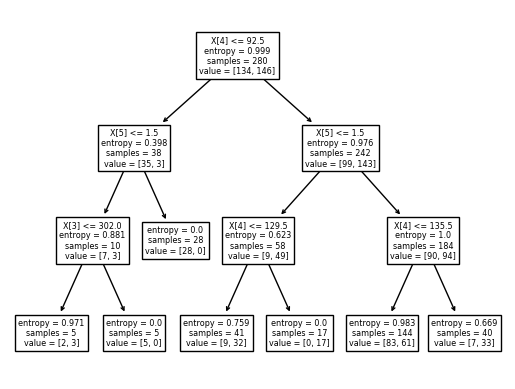

In [21]:
tree.plot_tree(model);

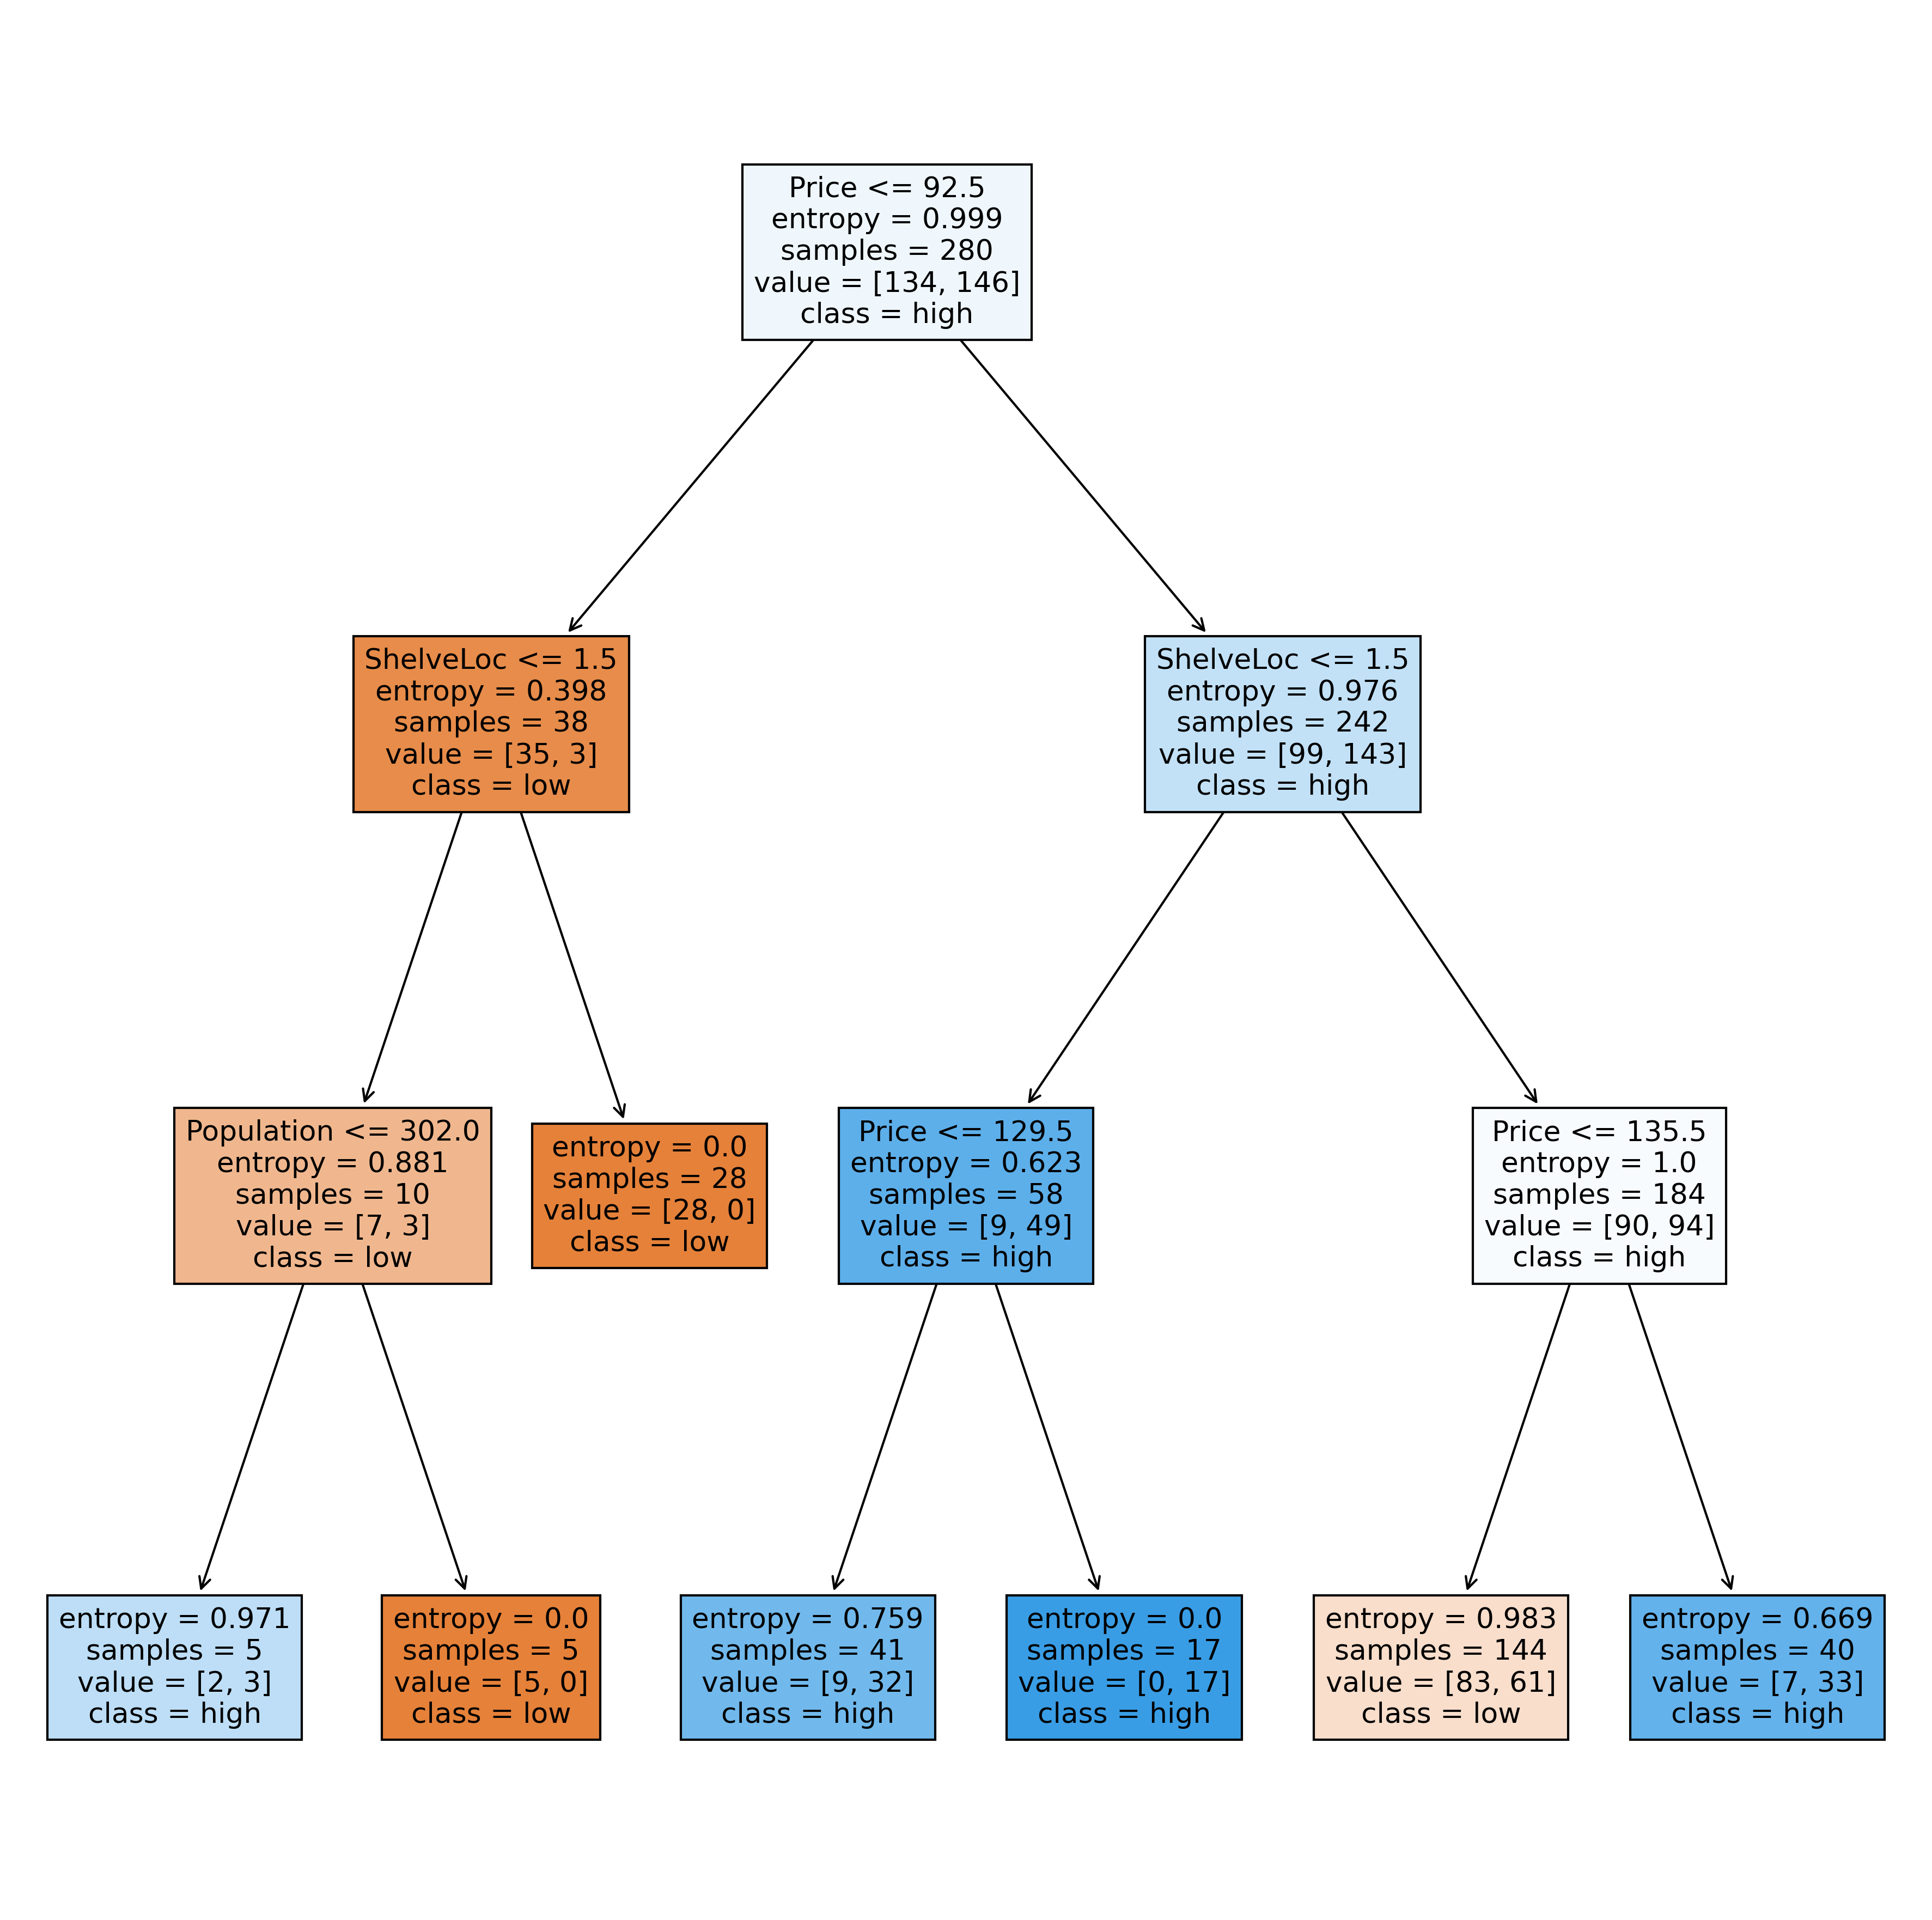

In [22]:
fn = ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education','Urban', 'US']
cn = ['low','high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [23]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.0525531 , 0.64903615,
       0.29841074, 0.        , 0.        , 0.        , 0.        ])

In [24]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

0    81
1    39
dtype: int64

In [25]:
pd.crosstab(y_test,preds)

col_0,0,1
sales_value,,
0,54,11
1,27,28


In [26]:
#Accuracy
np.mean(preds==y_test)

0.6833333333333333

# 68% Accuracy

# Building Decision Tree Classifier (CART) using Gini

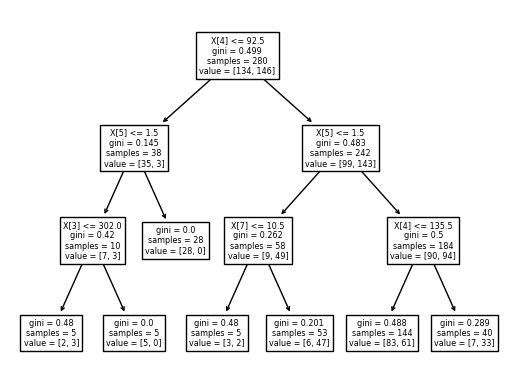

In [27]:
model1=DecisionTreeClassifier(criterion='gini',max_depth=3)
model1.fit(x_train,y_train)
tree.plot_tree(model1);

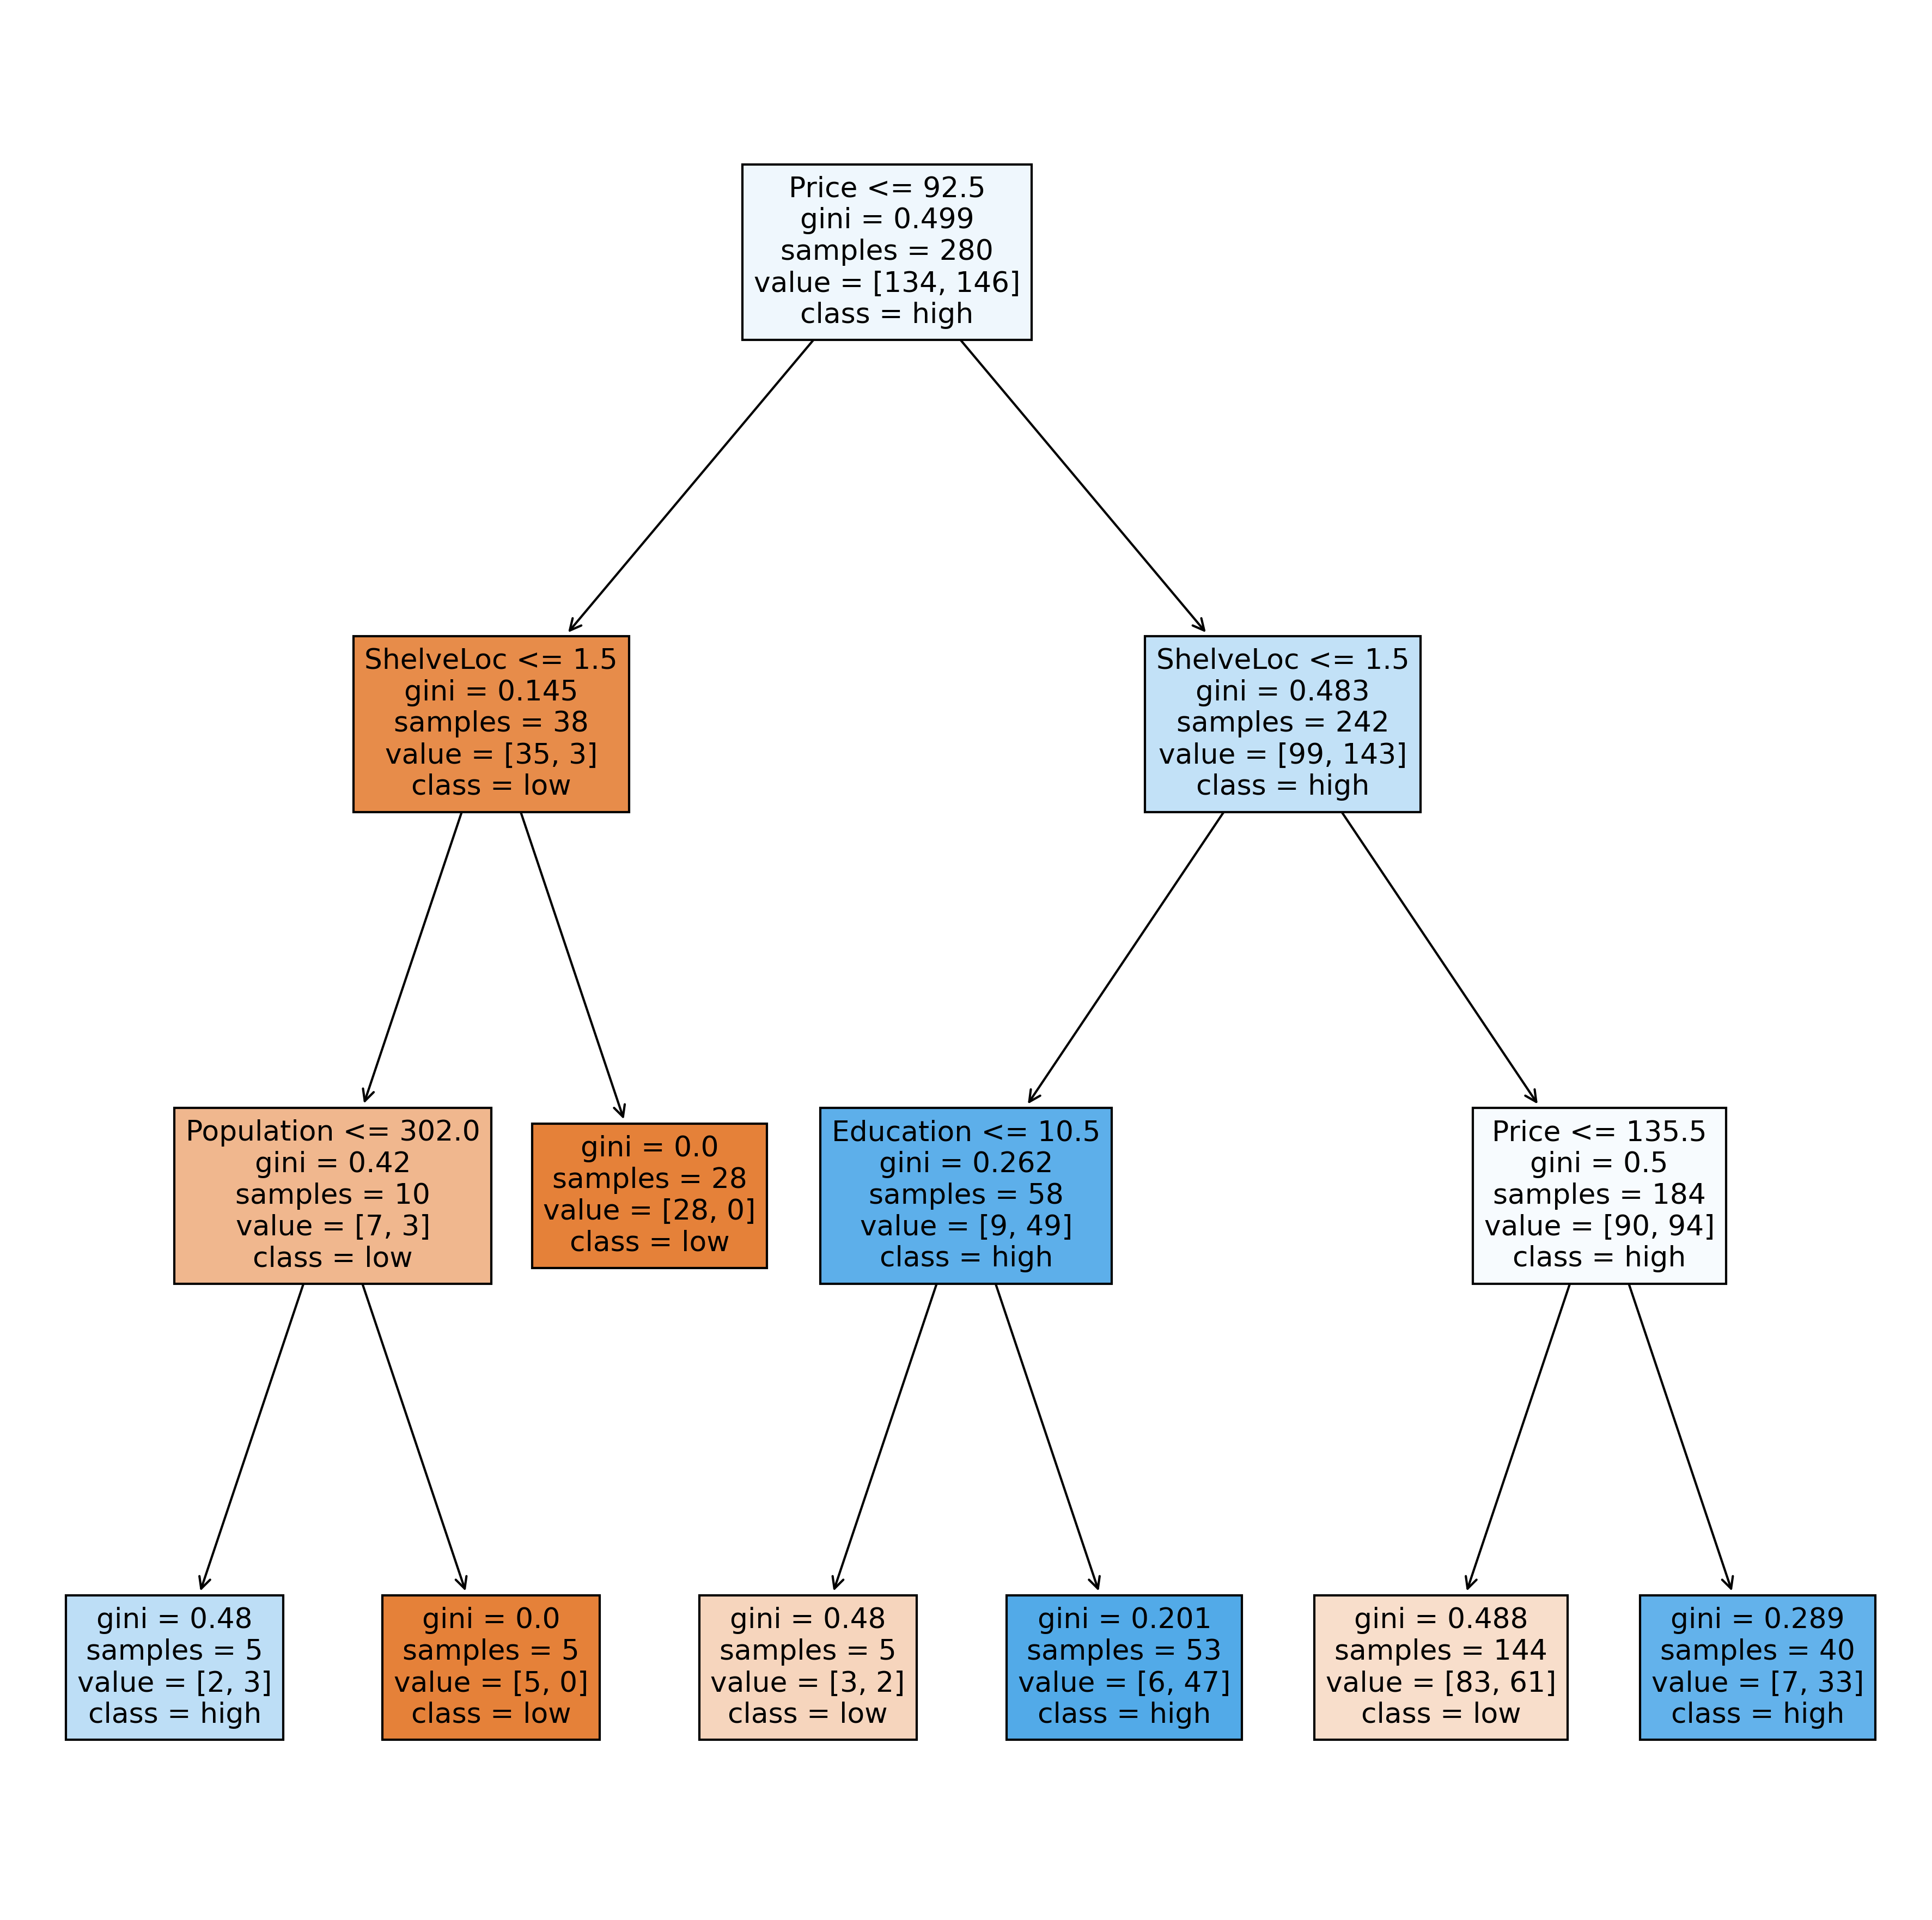

In [28]:
fn = ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education','Urban', 'US']
cn = ['low','high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [29]:
model1.feature_importances_

array([0.        , 0.        , 0.        , 0.04242091, 0.6434691 ,
       0.26307794, 0.        , 0.05103205, 0.        , 0.        ])

In [30]:
pred_gini=model1.predict(x_test)
pd.Series(pred_gini).value_counts()

0    85
1    35
dtype: int64

In [31]:
pd.crosstab(y_test,pred_gini)

col_0,0,1
sales_value,,
0,54,11
1,31,24


In [32]:
np.mean(pred_gini==y_test)

0.65

# Accuracy is 65%